#Pre-configuration

## Mount Google Drive

In [1]:
# Set up colab instance
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clone and pull github repository

In [2]:
# Make sure clone at root
%cd /content

!pip3 install pydicom
!git clone https://github.com/thomasp05/gif-705-projet

import os
os.chdir('gif-705-projet')

# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append('/content/gif-705-projet')

/content
     |████████████████████████████████| 1.9MB 8.2MB/s 
Cloning into 'gif-705-projet'...
remote: Enumerating objects: 240, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 240 (delta 136), reused 189 (delta 101), pack-reused 0
Receiving objects: 100% (240/240), 2.25 MiB | 14.11 MiB/s, done.
Resolving deltas: 100% (136/136), done.


Checkout branch

In [3]:
!git checkout "features/data-aug2" #develop
!git pull

Branch 'features/data-aug2' set up to track remote branch 'features/data-aug2' from 'origin'.
Switched to a new branch 'features/data-aug2'
Already up to date.


# Imports and load

In [4]:
import time
import random
import numpy as np

import torch

from dataset import *

from models import *
import models_parts
from train_helper import *

from torch.optim import lr_scheduler
from torchvision import transforms

torch.manual_seed(111)

## HYPERPARAMETERS

In [5]:
N_EPOCH = 3
start_epoch = 0
BATCH_SIZE = 4
google_drive_path = "/content/drive/My Drive/GIF-7005-Projet/"
checkpoint_path = google_drive_path + "checkpoint/" 

## Load dataset

In [6]:
dataset = dcm_dataset(google_drive_path + 'gif-7005-projet/data') # transforms are now used by default
print("Found {} images".format(len(dataset.img_files)))

Found 26684 images


## Show original/transformed image and mask

Display the same sample two times

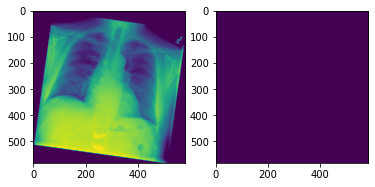

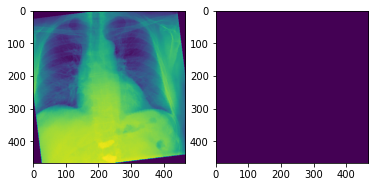

In [8]:
index = 30
for i in range(2):
  img, (target, mask) = dataset[index]
  plt.subplot('121')
  plt.imshow(img.squeeze())
  plt.subplot('122')
  plt.imshow(mask.squeeze())
  plt.show()

Display random samples

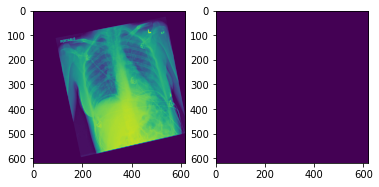

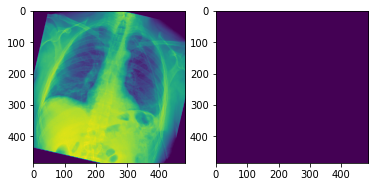

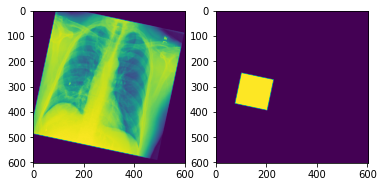

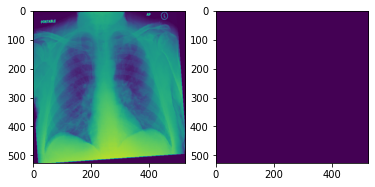

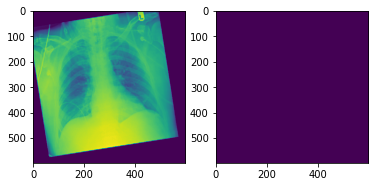

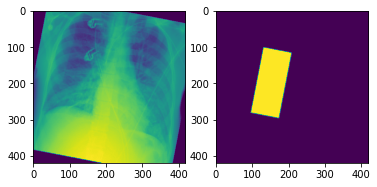

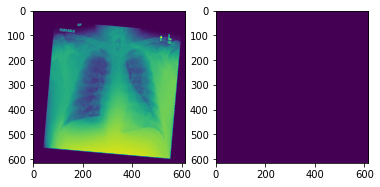

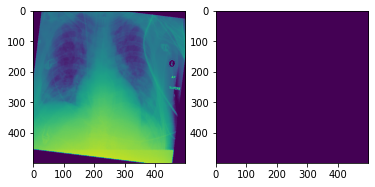

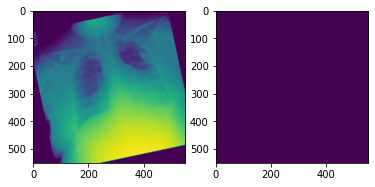

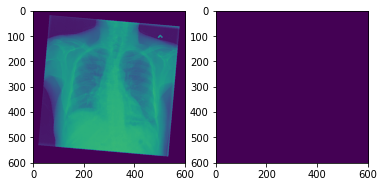

In [9]:
for i in range(10):
  index = np.random.randint(0, len(dataset))
  img, (target, mask) = dataset[index]
  plt.subplot('121')
  plt.imshow(img.squeeze())
  plt.subplot('122')
  plt.imshow(mask.squeeze())
  plt.show()